In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [63]:
# Initialize parameters
num_particles = 1000  # number of particles
num_grid_points = 20  # number of grid points in one dimension
length = 1.0  # length of the domain
time_step = 0.01  # time step size
num_steps = 100  # number of time steps
epsilon_0 = 8.85e-12  # permittivity of free space

In [64]:
# Initialize particle positions and velocities
positions = np.random.rand(num_particles, 2) * length
velocities = np.random.rand(num_particles, 2) * 2.0 - 1.0

# Initialize electric potential and charge density
phi = np.zeros((num_grid_points, num_grid_points))
rho = np.zeros((num_grid_points, num_grid_points))

In [65]:
# Main loop
for _ in range(num_steps):
    # Reset charge density
    rho = np.zeros_like(rho)

    # Deposit charge
    for i in range(num_particles):
        x, y = positions[i]
        j = int(x / length * num_grid_points)
        k = int(y / length * num_grid_points)
        rho[j, k] += 1.0

    # Gauss-Seidel method for Poisson equation
    for _ in range(1000):  # maximum iterations
        old_phi = phi.copy()
        for j in range(num_grid_points):
            for k in range(num_grid_points):
                if j == 0 or j == num_grid_points-1 or k == 0 or k == num_grid_points-1:
                    phi[j, k] = 0.0  # boundary condition
                else:
                    phi[j, k] = 0.25 * (phi[j-1, k] + phi[j+1, k] + phi[j, k-1] + phi[j, k+1] + rho[j, k] / epsilon_0)

        if np.linalg.norm(old_phi - phi) < 1e-6:
            break  # stop if the solution has converged

In [66]:
# Compute electric field from potential
E = np.gradient(-phi)

# Update particle velocities and positions
for i in range(num_particles):
    x, y = positions[i]
    j = int(x / length * num_grid_points)
    k = int(y / length * num_grid_points)
    velocities[i] += np.array([E[0][j, k], E[1][j, k]]) * time_step
    positions[i] += velocities[i] * time_step

# Periodic boundary conditions
positions = positions % length

Text(0.5, 0.92, 'phi')

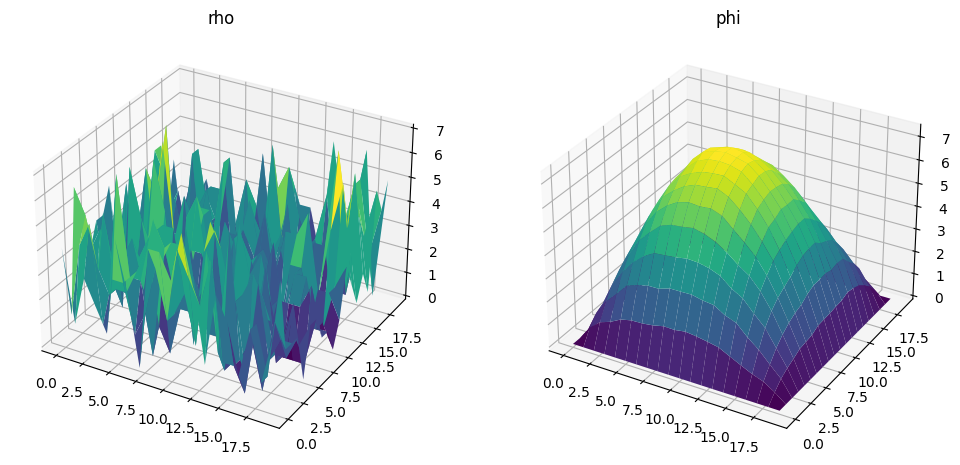

In [67]:
plot_x = np.arange(20)
plot_y = np.arange(20)
PLOT_X, PLOT_Y = np.meshgrid(plot_x, plot_y)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(PLOT_X, PLOT_Y, rho, cmap='viridis')
ax1.set_title('rho')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(PLOT_X, PLOT_Y, phi, cmap='viridis')
ax2.set_title('phi')